# Here we are predict the Customer closed the account or not.

## Domain Aalysis

In [1]:
import numpy as np  # use for missing value handle
import pandas as pd  # use for data cleaning,analysis
import matplotlib.pyplot as plt  #use for data visualization
import seaborn as sns  # use for visualization

In [2]:
# load the dataset
data = pd .read_csv("Churn_Modelling.csv")
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

### Bussiness Case:-
Here Bank Data, predict the customer own account is cloased or not.Account closed or not is predict based on diiferent featuers like name,salary,
credit card,religon,age,active or not,no 0f bank product use, how many time to join the bank,credit score etc.here we are predict based on ten thousand data.


### Atribute Information:-

          1 RowNumber:
                This is a sequential number that uniquely identifies each row in the dataset. It doesn't hold any 
                business significance but helps in distinguishing records.

          2 CustomerId:
                A unique identifier assigned to each customer. This is typically a numeric value used to track customer 
                information without revealing personal details.

          3 Surname:
                The last name or family name of the customer. This is a string value representing part of the customer's 
                personal information.

          4 CreditScore:
                A numeric value representing the creditworthiness of the customer, often ranging from 300 to 850. 
                A higher credit score indicates better creditworthiness.

          5 Geography:
                The country or region where the customer resides. This is typically a string value indicating the 
                customer's location.

          6 Gender:
                The gender of the customer, usually represented as 'Male' or 'Female'.

          7 Age:
                The age of the customer in years. This is a numeric value indicating how old the customer is.

          8 Tenure:
                The number of years the customer has been associated with the bank. This is a numeric value 
                indicating the length of the customer's relationship with the bank.

          9 Balance:
                The amount of money in the customer's account. This is a numeric value that can be zero or 
                any positive value, representing the customer's current balance.

          10 NumOfProducts:
                The number of bank products the customer is using. This is a numeric value representing 
                how many different products (like loans, credit cards, etc.) the customer has with the bank.

          11 HasCrCard:
                Indicates whether the customer has a credit card with the bank. This is typically a binary
                value, where 1 means 'Yes' and 0 means 'No'.

          12 IsActiveMember:
                Indicates whether the customer is an active member of the bank. This is also a binary value, 
                where 1 means 'Yes' and 0 means 'No'.

          13 EstimatedSalary:
                The estimated annual salary of the customer. This is a numeric value representing the customer's income.

          14 Exited:
                Indicates whether the customer has exited (closed their account) or not. This is a binary value, 
                where 1 means 'Yes' (the customer has left) and 0 means 'No' (the customer is still with the bank).








## Basic Check

In [3]:
data.head() # top five data value

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
data.tail() # last five value

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [5]:
data.describe() # use for all continus value function show

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

#### Insights :-
    1. RowNumber is totally unique number show.
    2. Age min is 18 and max is 92.
    3. Tenure maximum 10 years.
    4. Total nu of product is 4.

In [6]:
data.describe(include="O") # use for categorical featuer function 

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

#### Insights:-
    1. Geography is total 3 unique place.

In [7]:
data.info() # use for all dataset information show

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Insights :- 
    1. Here totally 10000 row and 13 columns.
    2. Here we can see the null values in any columns.
    3. total float column is 2 or int column is 9 or object column is 3.

## EDA:- Exploratory Data Analysis

In [8]:
# store the column in one veriable
for column in data:
    print(column)

RowNumber
CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

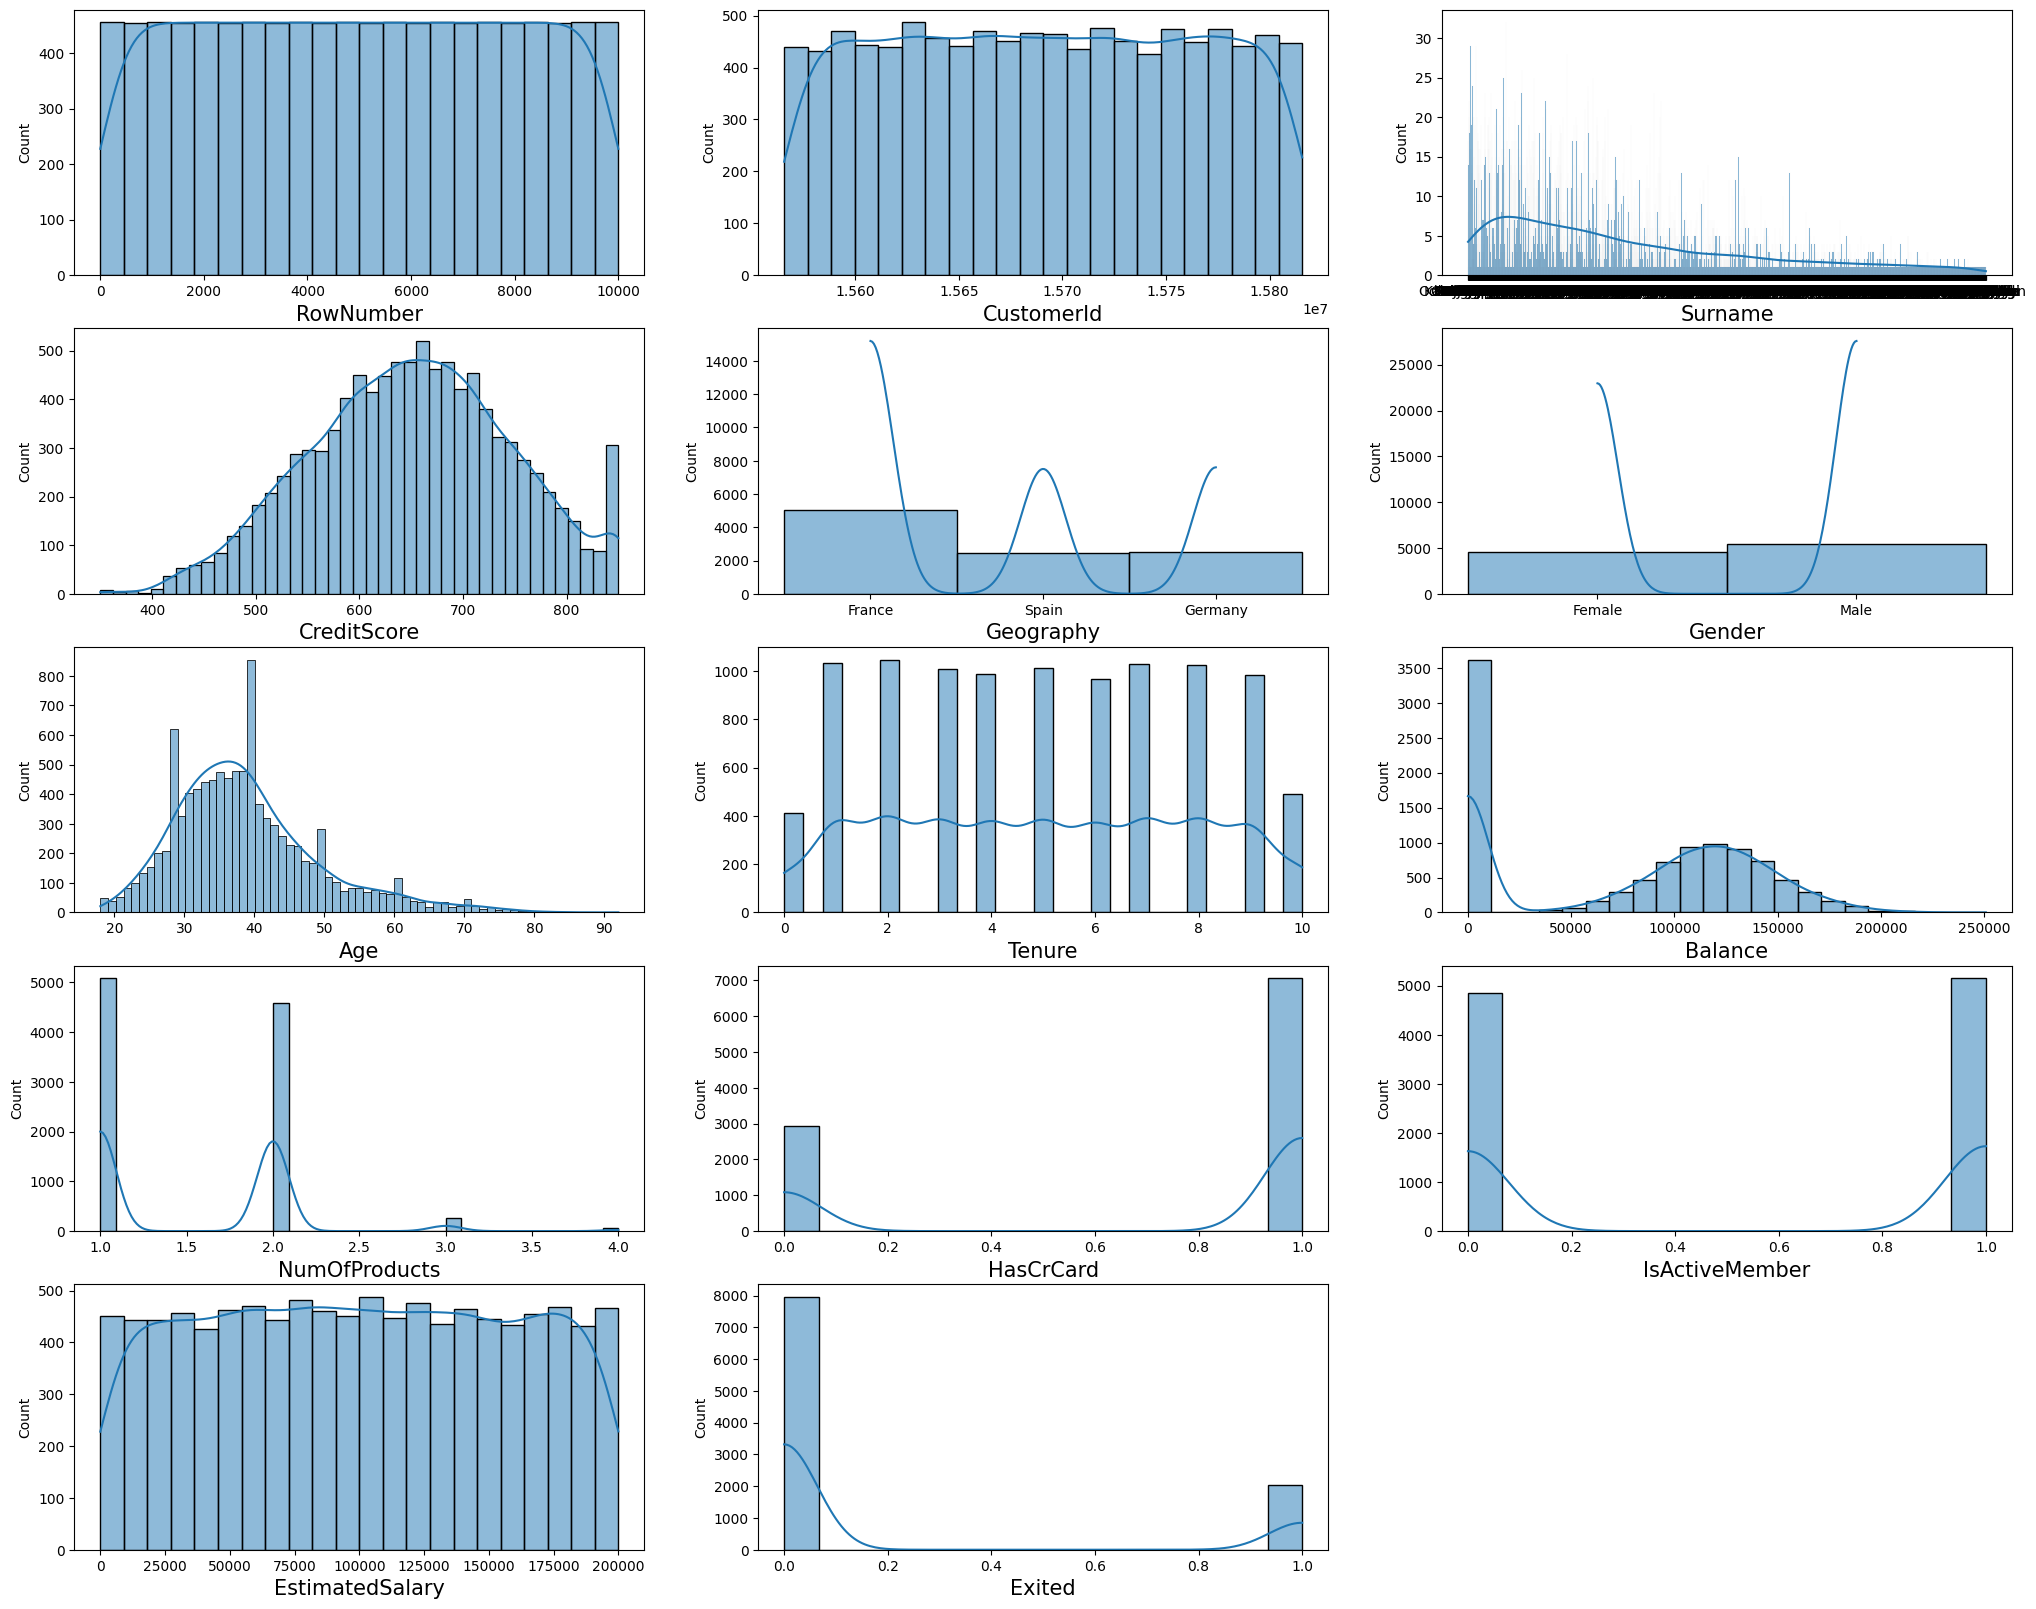

In [9]:
# Univerinat Analysis
plt.figure(figsize=(25,20)) # use for plot size 
plt_num = 1
for column in data:
    if plt_num <= 14:
        plt.subplot(5,3,plt_num)
        sns.histplot(data[column],kde=True) # create histogram plot
        plt.xlabel(column,fontsize=15)
    plt_num += 1
plt.tight_layout

#### Insights:-
    1. Here we can not see the Noral Distribution in any columns.

<Axes: xlabel='Balance', ylabel='Count'>

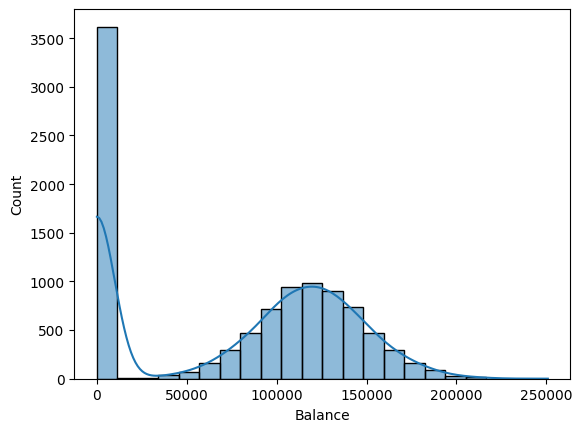

In [10]:
sns.histplot(x = data.Balance,kde=True) # use for check Normal Distribution

In [11]:
data.loc[data["Balance"] == 0] # check the how many 0 value in balance column

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     Hargrave          619    France  Female   42   
3             4    15701354         Boni          699    France  Female   39   
6             7    15592531     Bartlett          822    France    Male   50   
11           12    15737173      Andrews          497     Spain    Male   24   
12           13    15632264          Kay          476    France  Female   34   
...         ...         ...          ...          ...       ...     ...  ...   
9989       9990    15605622     McMillan          841     Spain    Male   28   
9992       9993    15657105  Chukwualuka          726     Spain    Male   36   
9994       9995    15719294         Wood          800    France  Female   29   
9995       9996    15606229     Obijiaku          771    France    Male   39   
9997       9998    15584532          Liu          709    France  Female   36   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2      0.0              1          1               1   
3          1      0.0              2          0               0   
6          7      0.0              2          1               1   
11         3      0.0              2          1               0   
12        10      0.0              2          1               0   
...      ...      ...            ...        ...             ...   
9989       4      0.0              2          1               1   
9992       2      0.0              1          1               0   
9994       2      0.0              2          0               0   
9995       5      0.0              2          1               0   
9997       7      0.0              1          0               1   

      EstimatedSalary  Exited  
0           101348.88       1  
3            93826.63       0  
6            10062.80       0  
11           76390.01       0  
12           26260.98       0  
...               ...     ...  
9989        179436.60       0  
9992        195192.40       0  
9994        167773.55       0  
9995         96270.64       0  
9997         42085.58       1  

[3617 rows x 14 columns]

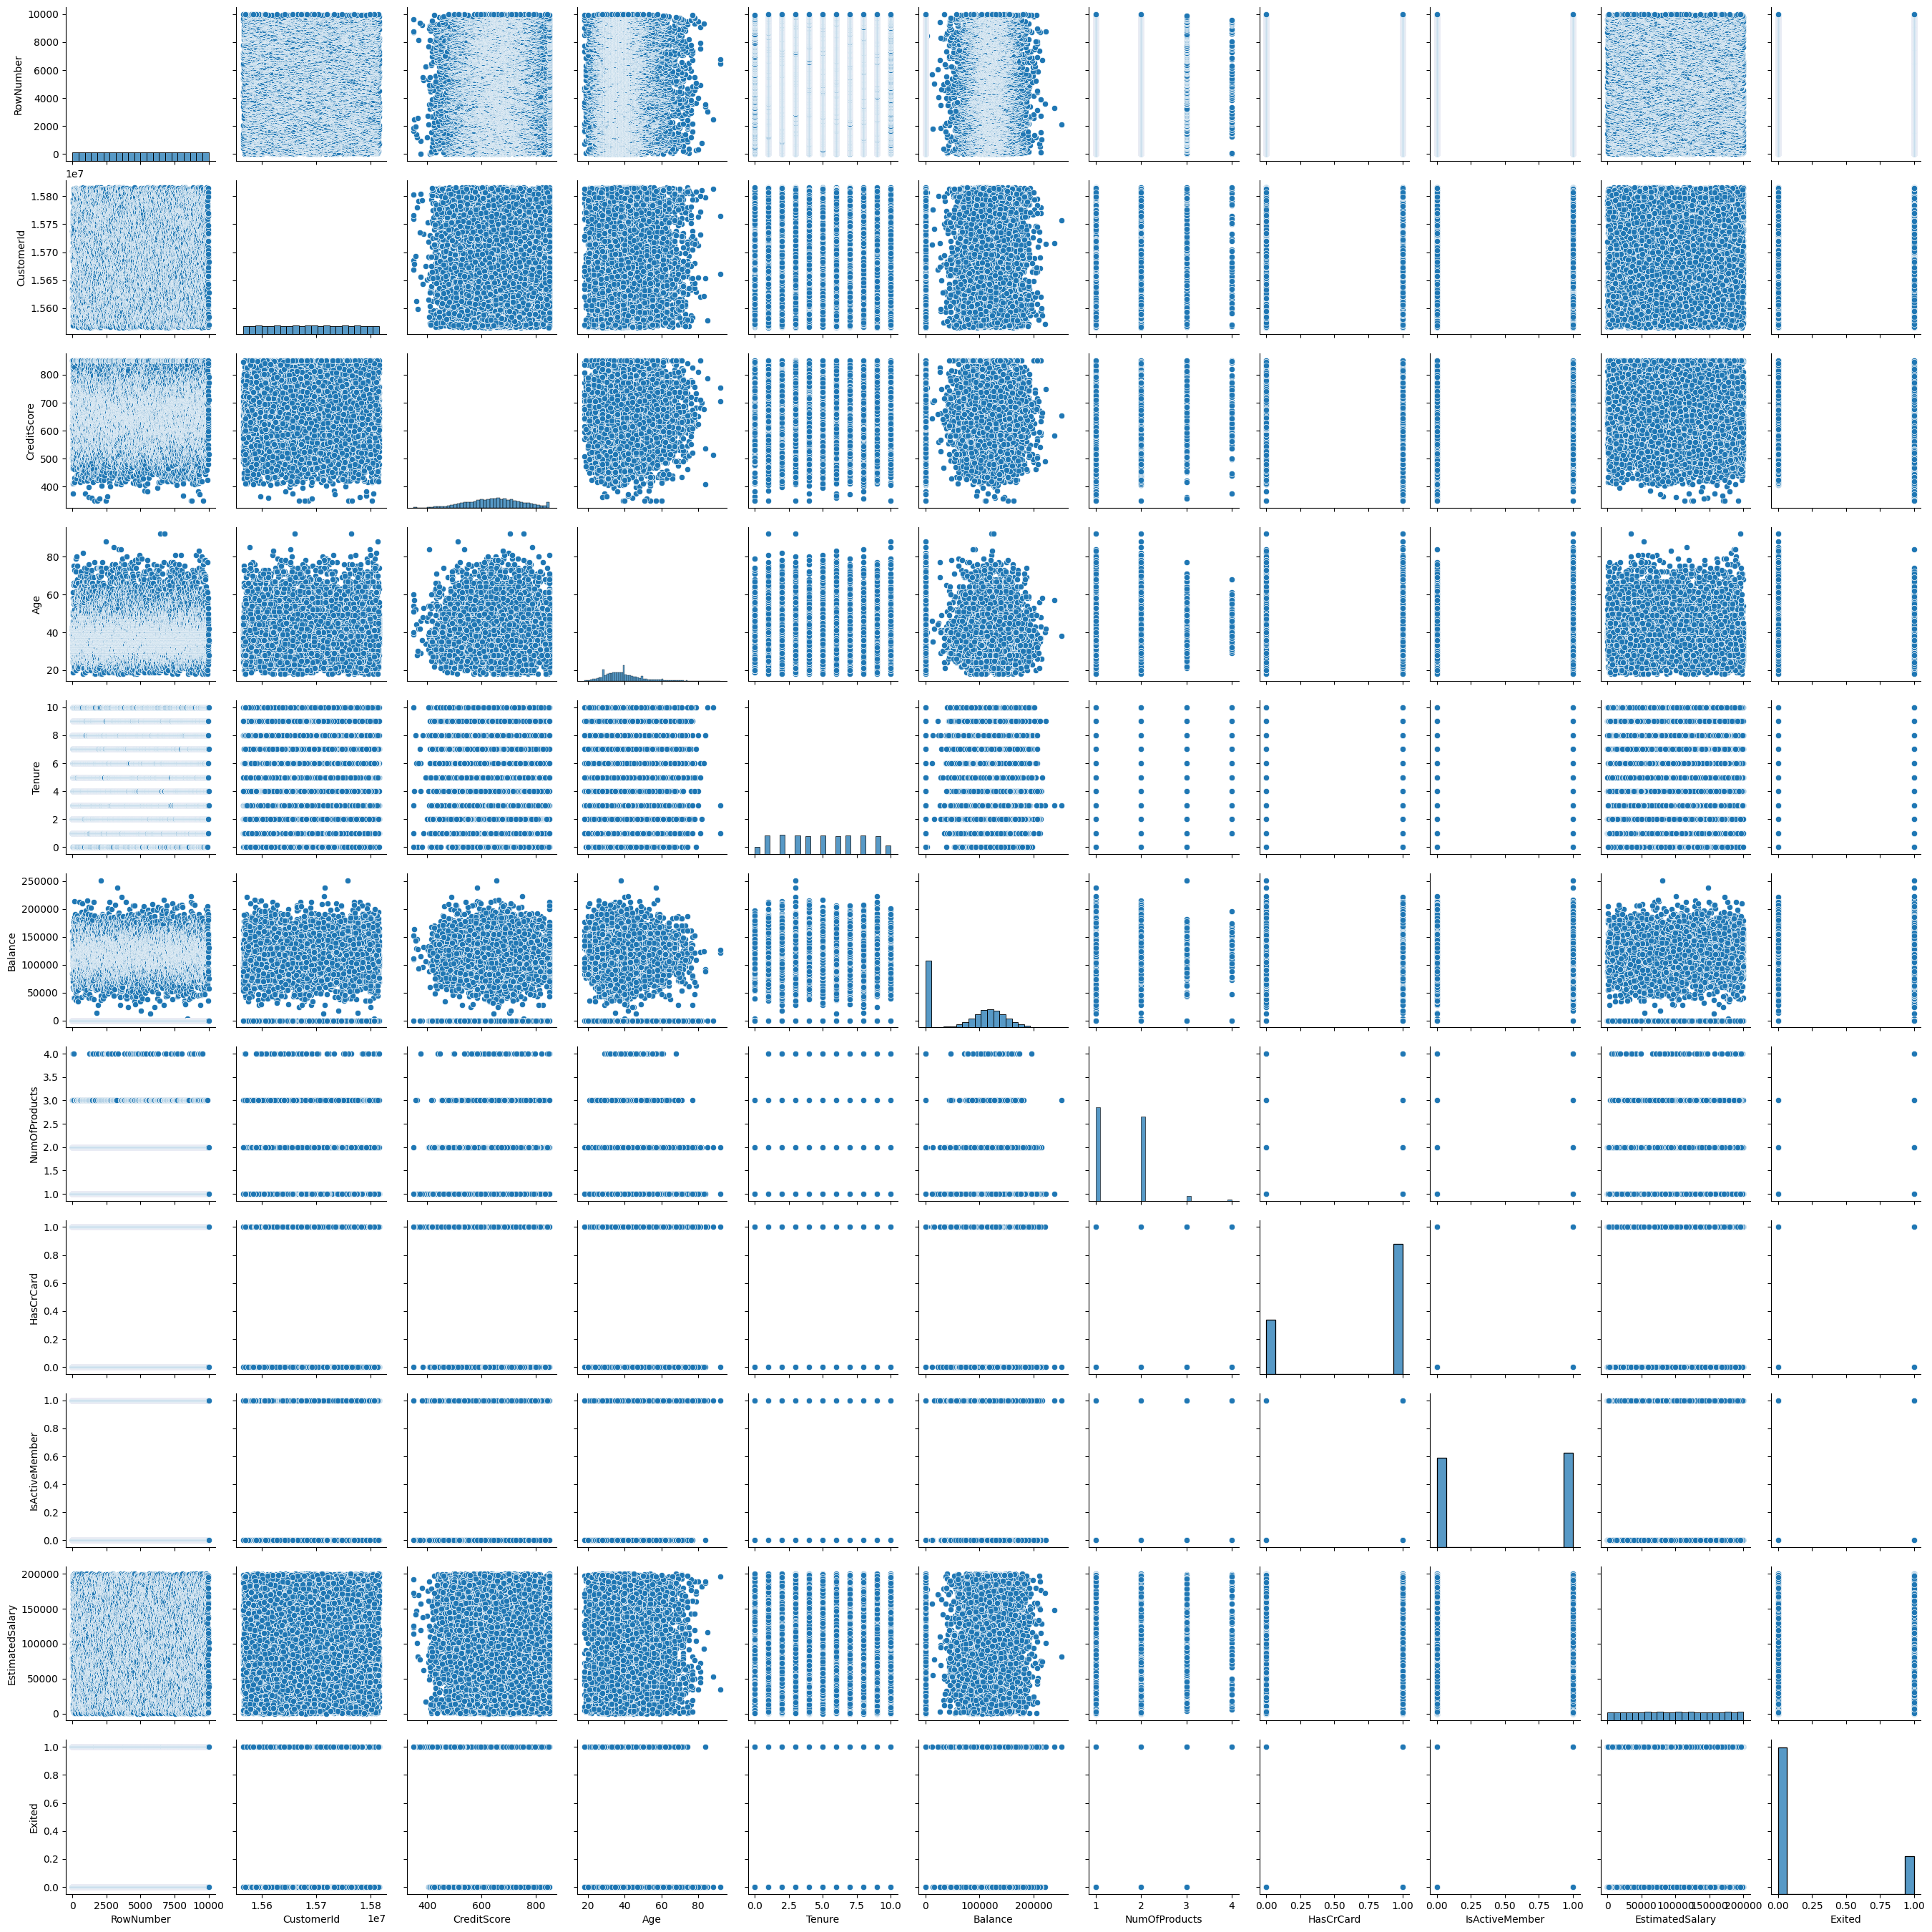

In [12]:
# Multivarint Analysis
sns.pairplot(data)

## Data Processing

In [13]:
data.isnull().sum() # check the null vallues

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* Here no any null values in different columns.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

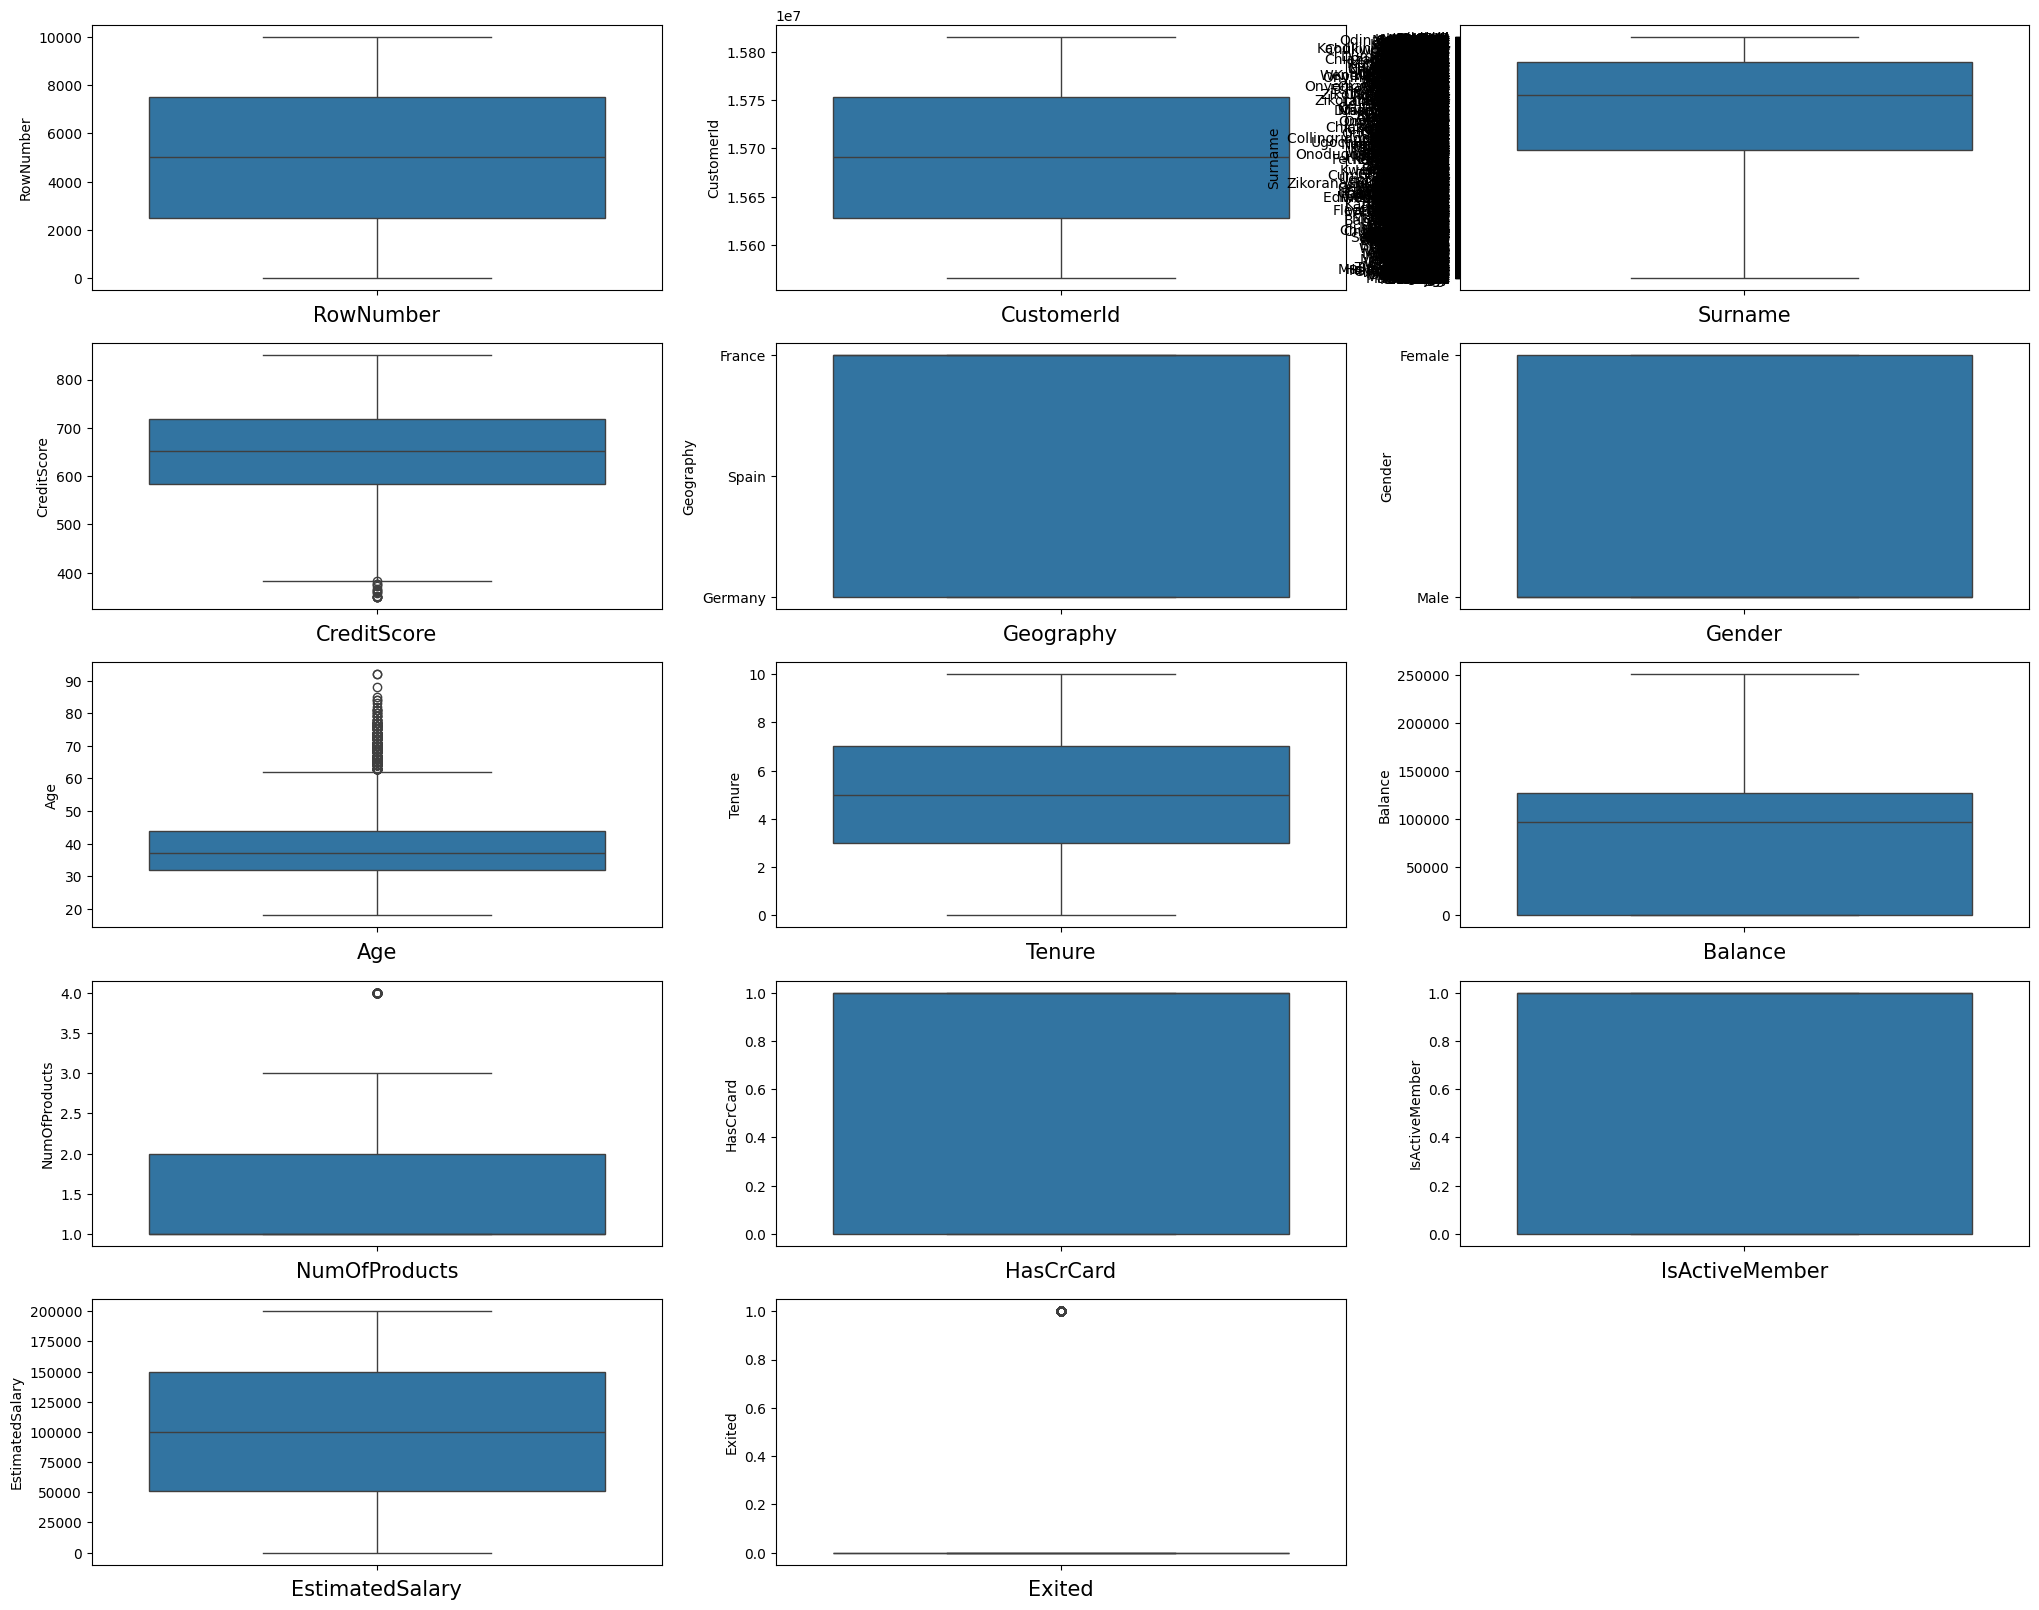

In [14]:
# Biavariant Analysis and use for check the outliers
plt.figure(figsize=(25,20)) # use for plot size 
plt_num = 1
for column in data:
    if plt_num <= 14:
        plt.subplot(5,3,plt_num)
        sns.boxplot(data[column]) # create boxplot plot
        plt.xlabel(column,fontsize=15)
    plt_num += 1
plt.tight_layout

#### Insights:-
    1. Here we can see the outliers in CreditScore and Age columns. 

In [15]:
data.NumOfProducts.unique() # check the unique value

array([1, 3, 2, 4], dtype=int64)

<Axes: xlabel='NumOfProducts'>

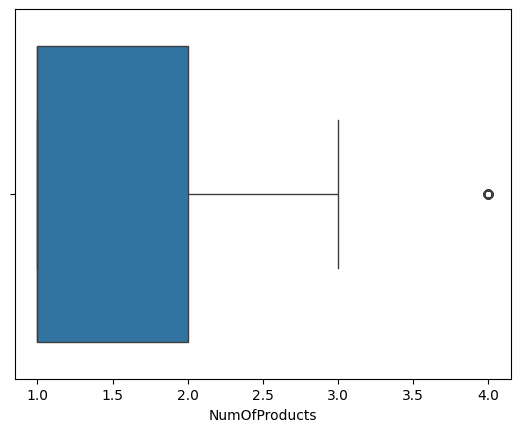

In [16]:
sns.boxplot(x = data.NumOfProducts) # check the outliers

* Here this is not Outliers.

<Axes: xlabel='CreditScore'>

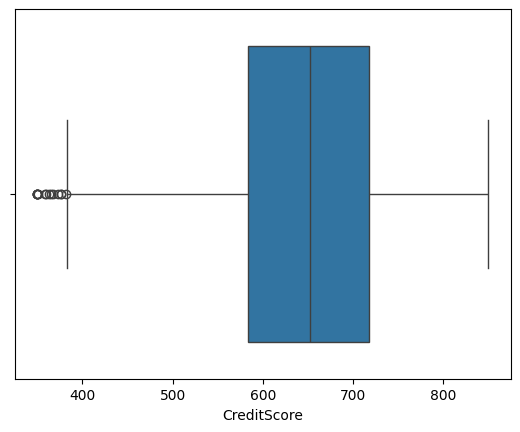

In [17]:
sns.boxplot(x = data.CreditScore) # check the outliers

* This is not Outliers.

<Axes: xlabel='Age'>

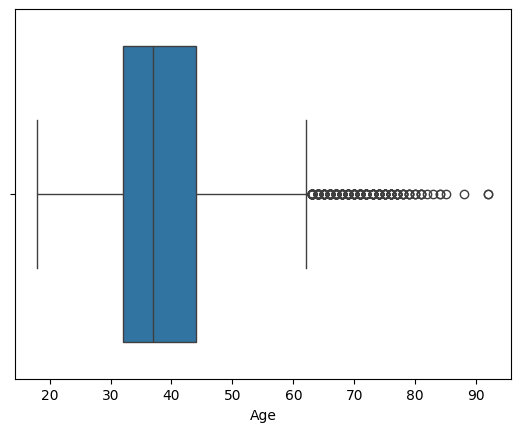

In [18]:
sns.boxplot(x = data.Age) # check the outliers

In [19]:
data.Age.median() # find the median

37.0

In [20]:
data.loc[data["Age"] >= 90,"Age"] = 37.0 # handle the outliers

<Axes: xlabel='Age'>

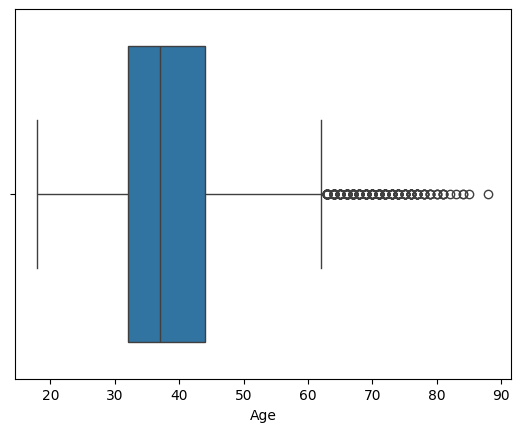

In [21]:
sns.boxplot(x = data.Age) # check the outliers

In [22]:
data.head() # top five value show

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## Featuer Selection

In [23]:
# import the encodeting type
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [24]:
LE = LabelEncoder() # store the label encoding
data["Surname"] = LE.fit_transform(data["Surname"]) # tranform the categorical to numerical value

In [25]:
data.head() # top five value show

RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  Tenure  \
0          1    15634602     1115          619    France  Female   42       2   
1          2    15647311     1177          608     Spain  Female   41       1   
2          3    15619304     2040          502    France  Female   42       8   
3          4    15701354      289          699    France  Female   39       1   
4          5    15737888     1822          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [26]:
OE = OneHotEncoder() # store the onehot encoding
df = pd.get_dummies(data["Geography"],dtype = "int",prefix="Geography") # tranform the categorical to numerical value

In [27]:
df

Geography_France  Geography_Germany  Geography_Spain
0                    1                  0                0
1                    0                  0                1
2                    1                  0                0
3                    1                  0                0
4                    0                  0                1
...                ...                ...              ...
9995                 1                  0                0
9996                 1                  0                0
9997                 1                  0                0
9998                 0                  1                0
9999                 1                  0                0

[10000 rows x 3 columns]

In [28]:
data1 = pd.concat([data,df],axis=1) # join the two tables

In [29]:
data1

RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     1115          619    France  Female   42   
1             2    15647311     1177          608     Spain  Female   41   
2             3    15619304     2040          502    France  Female   42   
3             4    15701354      289          699    France  Female   39   
4             5    15737888     1822          850     Spain  Female   43   
...         ...         ...      ...          ...       ...     ...  ...   
9995       9996    15606229     1999          771    France    Male   39   
9996       9997    15569892     1336          516    France    Male   35   
9997       9998    15584532     1570          709    France  Female   36   
9998       9999    15682355     2345          772   Germany    Male   42   
9999      10000    15628319     2751          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Geography_France  Geography_Germany  \
0           101348.88       1                 1                  0   
1           112542.58       0                 0                  0   
2           113931.57       1                 1                  0   
3            93826.63       0                 1                  0   
4            79084.10       0                 0                  0   
...               ...     ...               ...                ...   
9995         96270.64       0                 1                  0   
9996        101699.77       0                 1                  0   
9997         42085.58       1                 1                  0   
9998         92888.52       1                 0                  1   
9999         38190.78       0                 1                  0   

      Geography_Spain  
0                   0  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
9995                0  
9996                0  
9997                0  
9998                0  
9999                0  

[10000 rows x 17 columns]

In [30]:
df1 = pd.get_dummies(data["Gender"],dtype = "int",prefix="Gender") # tranform the categorical to numerical value

In [31]:
df1

Gender_Female  Gender_Male
0                 1            0
1                 1            0
2                 1            0
3                 1            0
4                 1            0
...             ...          ...
9995              0            1
9996              0            1
9997              1            0
9998              0            1
9999              1            0

[10000 rows x 2 columns]

In [32]:
data2 = pd.concat([data1,df1],axis=1) # join the two tables

In [33]:
data2

RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     1115          619    France  Female   42   
1             2    15647311     1177          608     Spain  Female   41   
2             3    15619304     2040          502    France  Female   42   
3             4    15701354      289          699    France  Female   39   
4             5    15737888     1822          850     Spain  Female   43   
...         ...         ...      ...          ...       ...     ...  ...   
9995       9996    15606229     1999          771    France    Male   39   
9996       9997    15569892     1336          516    France    Male   35   
9997       9998    15584532     1570          709    France  Female   36   
9998       9999    15682355     2345          772   Germany    Male   42   
9999      10000    15628319     2751          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Geography_France  Geography_Germany  \
0           101348.88       1                 1                  0   
1           112542.58       0                 0                  0   
2           113931.57       1                 1                  0   
3            93826.63       0                 1                  0   
4            79084.10       0                 0                  0   
...               ...     ...               ...                ...   
9995         96270.64       0                 1                  0   
9996        101699.77       0                 1                  0   
9997         42085.58       1                 1                  0   
9998         92888.52       1                 0                  1   
9999         38190.78       0                 1                  0   

      Geography_Spain  Gender_Female  Gender_Male  
0                   0              1            0  
1                   1              1            0  
2                   0              1            0  
3                   0              1            0  
4                   1              1            0  
...               ...            ...          ...  
9995                0              0            1  
9996                0              0            1  
9997                0              1            0  
9998                0              0            1  
9999                0              1            0  

[10000 rows x 19 columns]

In [34]:
data3 = data2.drop(["RowNumber","Geography","Gender"],axis=1) # drop the columns

In [35]:
data3

CustomerId  Surname  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0       15634602     1115          619   42       2       0.00              1   
1       15647311     1177          608   41       1   83807.86              1   
2       15619304     2040          502   42       8  159660.80              3   
3       15701354      289          699   39       1       0.00              2   
4       15737888     1822          850   43       2  125510.82              1   
...          ...      ...          ...  ...     ...        ...            ...   
9995    15606229     1999          771   39       5       0.00              2   
9996    15569892     1336          516   35      10   57369.61              1   
9997    15584532     1570          709   36       7       0.00              1   
9998    15682355     2345          772   42       3   75075.31              2   
9999    15628319     2751          792   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1               1        101348.88       1                 1   
1             0               1        112542.58       0                 0   
2             1               0        113931.57       1                 1   
3             0               0         93826.63       0                 1   
4             1               1         79084.10       0                 0   
...         ...             ...              ...     ...               ...   
9995          1               0         96270.64       0                 1   
9996          1               1        101699.77       0                 1   
9997          0               1         42085.58       1                 1   
9998          1               0         92888.52       1                 0   
9999          1               0         38190.78       0                 1   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                     0                0              1            0  
1                     0                1              1            0  
2                     0                0              1            0  
3                     0                0              1            0  
4                     0                1              1            0  
...                 ...              ...            ...          ...  
9995                  0                0              0            1  
9996                  0                0              0            1  
9997                  0                0              1            0  
9998                  1                0              0            1  
9999                  0                0              1            0  

[10000 rows x 16 columns]

<Axes: >

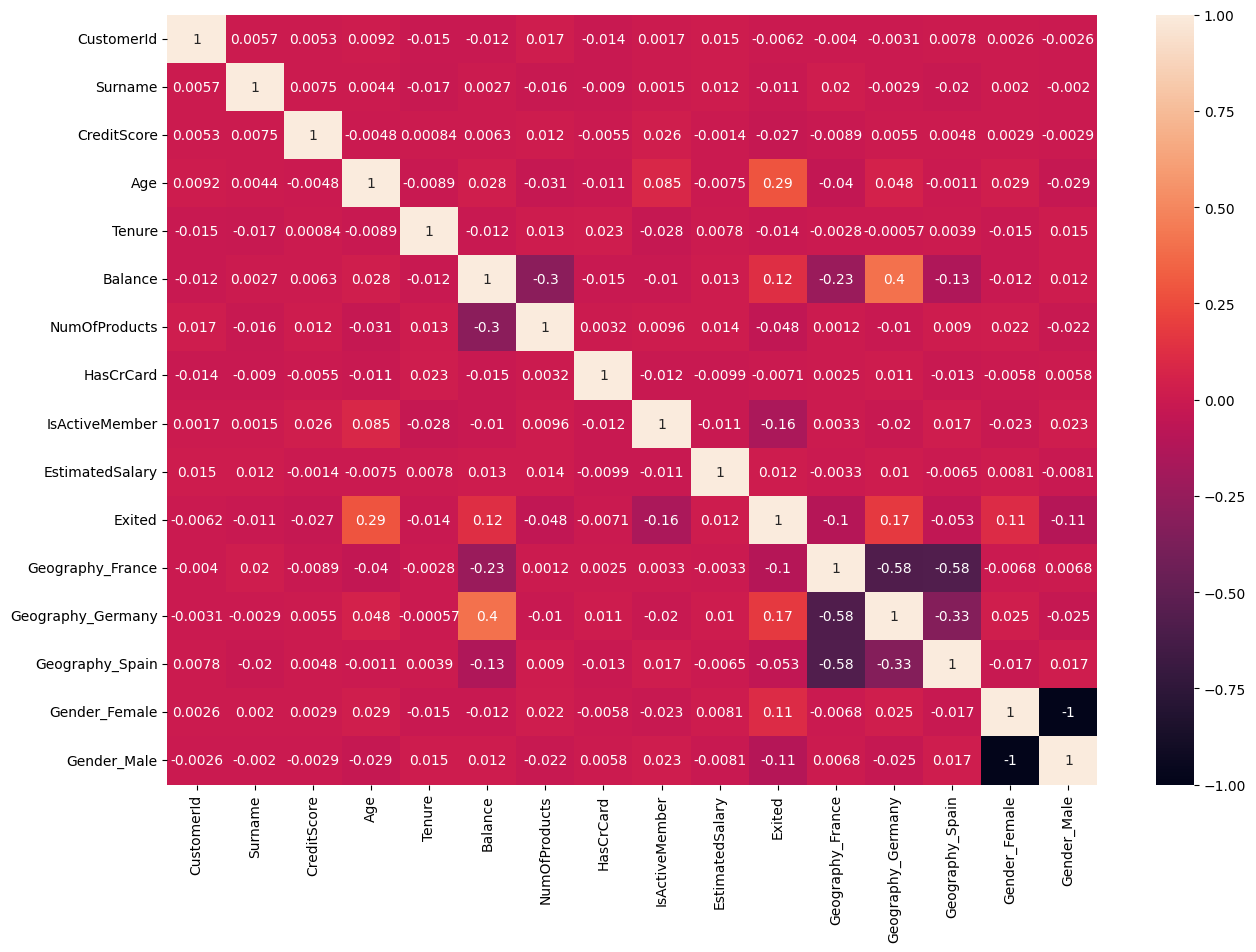

In [36]:
plt.figure(figsize=(15,10)) # create the plot size
sns.heatmap(data3.corr(),annot=True) # use for check the columns between relationships

* Here we can not see the 90% up relationship in different columns. It is basically all columns are important.

In [37]:
data3.corr() # use for check the columns between relationships

CustomerId   Surname  CreditScore       Age    Tenure  \
CustomerId           1.000000  0.005689     0.005308  0.009200 -0.014883   
Surname              0.005689  1.000000     0.007489  0.004411 -0.017412   
CreditScore          0.005308  0.007489     1.000000 -0.004829  0.000842   
Age                  0.009200  0.004411    -0.004829  1.000000 -0.008927   
Tenure              -0.014883 -0.017412     0.000842 -0.008927  1.000000   
Balance             -0.012419  0.002657     0.006268  0.027584 -0.012254   
NumOfProducts        0.016972 -0.016460     0.012238 -0.030704  0.013444   
HasCrCard           -0.014025 -0.008993    -0.005458 -0.011277  0.022583   
IsActiveMember       0.001665  0.001483     0.025651  0.084671 -0.028362   
EstimatedSalary      0.015271  0.011850    -0.001384 -0.007492  0.007784   
Exited              -0.006248 -0.010822    -0.027094  0.286588 -0.014001   
Geography_France    -0.004049  0.020194    -0.008928 -0.040357 -0.002848   
Geography_Germany   -0.003097 -0.002913     0.005538  0.047626 -0.000567   
Geography_Spain      0.007800 -0.020464     0.004780 -0.001086  0.003868   
Gender_Female        0.002641  0.002049     0.002857  0.028574 -0.014733   
Gender_Male         -0.002641 -0.002049    -0.002857 -0.028574  0.014733   

                    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId        -0.012419       0.016972  -0.014025        0.001665   
Surname            0.002657      -0.016460  -0.008993        0.001483   
CreditScore        0.006268       0.012238  -0.005458        0.025651   
Age                0.027584      -0.030704  -0.011277        0.084671   
Tenure            -0.012254       0.013444   0.022583       -0.028362   
Balance            1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts     -0.304180       1.000000   0.003183        0.009612   
HasCrCard         -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember    -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary    0.012797       0.014204  -0.009933       -0.011421   
Exited             0.118533      -0.047820  -0.007138       -0.156128   
Geography_France  -0.231329       0.001230   0.002467        0.003317   
Geography_Germany  0.401110      -0.010419   0.010577       -0.020486   
Geography_Spain   -0.134892       0.009039  -0.013480        0.016732   
Gender_Female     -0.012087       0.021859  -0.005766       -0.022544   
Gender_Male        0.012087      -0.021859   0.005766        0.022544   

                   EstimatedSalary    Exited  Geography_France  \
CustomerId                0.015271 -0.006248         -0.004049   
Surname                   0.011850 -0.010822          0.020194   
CreditScore              -0.001384 -0.027094         -0.008928   
Age                      -0.007492  0.286588         -0.040357   
Tenure                    0.007784 -0.014001         -0.002848   
Balance                   0.012797  0.118533         -0.231329   
NumOfProducts             0.014204 -0.047820          0.001230   
HasCrCard                -0.009933 -0.007138          0.002467   
IsActiveMember           -0.011421 -0.156128          0.003317   
EstimatedSalary           1.000000  0.012097         -0.003332   
Exited                    0.012097  1.000000         -0.104955   
Geography_France         -0.003332 -0.104955          1.000000   
Geography_Germany         0.010297  0.173488         -0.580359   
Geography_Spain          -0.006482 -0.052667         -0.575418   
Gender_Female             0.008112  0.106512         -0.006772   
Gender_Male              -0.008112 -0.106512          0.006772   

                   Geography_Germany  Geography_Spain  Gender_Female  \
CustomerId                 -0.003097         0.007800       0.002641   
Surname                    -0.002913        -0.020464       0.002049   
CreditScore                 0.005538         0.004780       0.002857   
Age                         0.047626        -0.001086       0.028574   
T

## Logistic Regression Algorithm 

In [38]:
x1 = data3.drop("Exited",axis=1) # create the Independent Variables
y1 = data3.Exited  # create the Dependent Variable

In [39]:
x1

CustomerId  Surname  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0       15634602     1115          619   42       2       0.00              1   
1       15647311     1177          608   41       1   83807.86              1   
2       15619304     2040          502   42       8  159660.80              3   
3       15701354      289          699   39       1       0.00              2   
4       15737888     1822          850   43       2  125510.82              1   
...          ...      ...          ...  ...     ...        ...            ...   
9995    15606229     1999          771   39       5       0.00              2   
9996    15569892     1336          516   35      10   57369.61              1   
9997    15584532     1570          709   36       7       0.00              1   
9998    15682355     2345          772   42       3   75075.31              2   
9999    15628319     2751          792   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
0             1               1        101348.88                 1   
1             0               1        112542.58                 0   
2             1               0        113931.57                 1   
3             0               0         93826.63                 1   
4             1               1         79084.10                 0   
...         ...             ...              ...               ...   
9995          1               0         96270.64                 1   
9996          1               1        101699.77                 1   
9997          0               1         42085.58                 1   
9998          1               0         92888.52                 0   
9999          1               0         38190.78                 1   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                     0                0              1            0  
1                     0                1              1            0  
2                     0                0              1            0  
3                     0                0              1            0  
4                     0                1              1            0  
...                 ...              ...            ...          ...  
9995                  0                0              0            1  
9996                  0                0              0            1  
9997                  0                0              1            0  
9998                  1                0              0            1  
9999                  0                0              1            0  

[10000 rows x 15 columns]

In [40]:
y1

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [64]:
# import the Standardsacler
from sklearn.preprocessing import StandardScaler

In [65]:
SE = StandardScaler() # store the Standardscaler
df3 = SE.fit_transform(x1) # use for data tranform to the certain range

In [66]:
df3

array([[-0.78321342, -0.46418322, -0.32622142, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.60653412, -0.3909112 , -0.44003595, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-0.99588476,  0.62898807, -1.53679418, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [-1.47928179,  0.07353887,  0.60498839, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.11935577,  0.98943914,  1.25683526, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [-0.87055909,  1.4692527 ,  1.46377078, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [67]:
x1.columns # show the all columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [68]:
# Store all the data in Dataframe
x = pd.DataFrame(data = df3,columns=['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'])

In [69]:
x # Independent Variables

CustomerId   Surname  CreditScore       Age    Tenure   Balance  \
0      -0.783213 -0.464183    -0.326221  0.295323 -1.041760 -1.225848   
1      -0.606534 -0.390911    -0.440036  0.199724 -1.387538  0.117350   
2      -0.995885  0.628988    -1.536794  0.295323  1.032908  1.333053   
3       0.144767 -1.440356     0.501521  0.008527 -1.387538 -1.225848   
4       0.652659  0.371354     2.063884  0.390921 -1.041760  0.785728   
...          ...       ...          ...       ...       ...       ...   
9995   -1.177652  0.580534     1.246488  0.008527 -0.004426 -1.225848   
9996   -1.682806 -0.203004    -1.391939 -0.373867  1.724464 -0.306379   
9997   -1.479282  0.073539     0.604988 -0.278268  0.687130 -1.225848   
9998   -0.119356  0.989439     1.256835  0.295323 -0.695982 -0.022608   
9999   -0.870559  1.469253     1.463771 -1.043056 -0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0         -0.911583   0.646092        0.970243         0.021886   
1         -0.911583  -1.547768        0.970243         0.216534   
2          2.527057   0.646092       -1.030670         0.240687   
3          0.807737  -1.547768       -1.030670        -0.108918   
4         -0.911583   0.646092        0.970243        -0.365276   
...             ...        ...             ...              ...   
9995       0.807737   0.646092       -1.030670        -0.066419   
9996      -0.911583   0.646092        0.970243         0.027988   
9997      -0.911583  -1.547768        0.970243        -1.008643   
9998       0.807737   0.646092       -1.030670        -0.125231   
9999      -0.911583   0.646092       -1.030670        -1.076370   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0             0.997204          -0.578736        -0.573809       1.095988   
1            -1.002804          -0.578736         1.742740       1.095988   
2             0.997204          -0.578736        -0.573809       1.095988   
3             0.997204          -0.578736        -0.573809       1.095988   
4            -1.002804          -0.578736         1.742740       1.095988   
...                ...                ...              ...            ...   
9995          0.997204          -0.578736        -0.573809      -0.912419   
9996          0.997204          -0.578736        -0.573809      -0.912419   
9997          0.997204          -0.578736        -0.573809       1.095988   
9998         -1.002804           1.727904        -0.573809      -0.912419   
9999          0.997204          -0.578736        -0.573809       1.095988   

      Gender_Male  
0       -1.095988  
1       -1.095988  
2       -1.095988  
3       -1.095988  
4       -1.095988  
...           ...  
9995     0.912419  
9996     0.912419  
9997    -1.095988  
9998     0.912419  
9999    -1.095988  

[10000 rows x 15 columns]

In [70]:
y = data3.Exited # Dependent Variable

In [71]:
x

CustomerId   Surname  CreditScore       Age    Tenure   Balance  \
0      -0.783213 -0.464183    -0.326221  0.295323 -1.041760 -1.225848   
1      -0.606534 -0.390911    -0.440036  0.199724 -1.387538  0.117350   
2      -0.995885  0.628988    -1.536794  0.295323  1.032908  1.333053   
3       0.144767 -1.440356     0.501521  0.008527 -1.387538 -1.225848   
4       0.652659  0.371354     2.063884  0.390921 -1.041760  0.785728   
...          ...       ...          ...       ...       ...       ...   
9995   -1.177652  0.580534     1.246488  0.008527 -0.004426 -1.225848   
9996   -1.682806 -0.203004    -1.391939 -0.373867  1.724464 -0.306379   
9997   -1.479282  0.073539     0.604988 -0.278268  0.687130 -1.225848   
9998   -0.119356  0.989439     1.256835  0.295323 -0.695982 -0.022608   
9999   -0.870559  1.469253     1.463771 -1.043056 -0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0         -0.911583   0.646092        0.970243         0.021886   
1         -0.911583  -1.547768        0.970243         0.216534   
2          2.527057   0.646092       -1.030670         0.240687   
3          0.807737  -1.547768       -1.030670        -0.108918   
4         -0.911583   0.646092        0.970243        -0.365276   
...             ...        ...             ...              ...   
9995       0.807737   0.646092       -1.030670        -0.066419   
9996      -0.911583   0.646092        0.970243         0.027988   
9997      -0.911583  -1.547768        0.970243        -1.008643   
9998       0.807737   0.646092       -1.030670        -0.125231   
9999      -0.911583   0.646092       -1.030670        -1.076370   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0             0.997204          -0.578736        -0.573809       1.095988   
1            -1.002804          -0.578736         1.742740       1.095988   
2             0.997204          -0.578736        -0.573809       1.095988   
3             0.997204          -0.578736        -0.573809       1.095988   
4            -1.002804          -0.578736         1.742740       1.095988   
...                ...                ...              ...            ...   
9995          0.997204          -0.578736        -0.573809      -0.912419   
9996          0.997204          -0.578736        -0.573809      -0.912419   
9997          0.997204          -0.578736        -0.573809       1.095988   
9998         -1.002804           1.727904        -0.573809      -0.912419   
9999          0.997204          -0.578736        -0.573809       1.095988   

      Gender_Male  
0       -1.095988  
1       -1.095988  
2       -1.095988  
3       -1.095988  
4       -1.095988  
...           ...  
9995     0.912419  
9996     0.912419  
9997    -1.095988  
9998     0.912419  
9999    -1.095988  

[10000 rows x 15 columns]

In [72]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split # import train split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40) # data devided into train and test part

In [74]:
x_train

CustomerId   Surname  CreditScore       Age    Tenure   Balance  \
4318    1.567362 -0.536273     0.232504  3.641271  1.724464  0.000395   
471    -0.101700 -0.466547     0.542908 -0.182670 -1.387538  1.174405   
9656   -1.219469 -1.349357     0.470480 -0.660662 -0.350204  0.127187   
8243   -1.651082  0.246083     1.805214 -0.947458 -0.695982  1.160172   
9984    0.072769 -0.862452    -0.502117 -0.373867  0.687130  0.226247   
...          ...       ...          ...       ...       ...       ...   
7839   -1.180794 -1.770080    -0.874601 -1.712246 -0.695982 -1.225848   
3603    1.134221  0.366627     1.029206  0.773316  0.687130  0.719461   
5959   -0.351879 -1.228812     0.708456 -0.565064  0.687130 -1.225848   
5426    0.106091  1.029621    -0.150326 -0.278268 -1.387538 -1.225848   
7608   -1.284071  1.410162     0.460134 -0.756261 -0.004426 -1.225848   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
4318       0.807737  -1.547768        0.970243        -0.704160   
471       -0.911583   0.646092       -1.030670        -1.381745   
9656      -0.911583  -1.547768        0.970243        -0.830769   
8243       0.807737  -1.547768        0.970243        -0.502497   
9984       0.807737   0.646092        0.970243        -0.841538   
...             ...        ...             ...              ...   
7839       0.807737   0.646092        0.970243        -1.677409   
3603       0.807737   0.646092       -1.030670        -0.793228   
5959       0.807737   0.646092       -1.030670        -1.392401   
5426      -0.911583   0.646092       -1.030670        -0.990402   
7608       0.807737  -1.547768        0.970243        -1.497043   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
4318         -1.002804           1.727904        -0.573809       1.095988   
471           0.997204          -0.578736        -0.573809      -0.912419   
9656         -1.002804           1.727904        -0.573809      -0.912419   
8243          0.997204          -0.578736        -0.573809      -0.912419   
9984         -1.002804           1.727904        -0.573809      -0.912419   
...                ...                ...              ...            ...   
7839          0.997204          -0.578736        -0.573809       1.095988   
3603          0.997204          -0.578736        -0.573809       1.095988   
5959         -1.002804          -0.578736         1.742740       1.095988   
5426         -1.002804          -0.578736         1.742740       1.095988   
7608         -1.002804          -0.578736         1.742740       1.095988   

      Gender_Male  
4318    -1.095988  
471      0.912419  
9656     0.912419  
8243     0.912419  
9984     0.912419  
...           ...  
7839    -1.095988  
3603    -1.095988  
5959    -1.095988  
5426    -1.095988  
7608    -1.095988  

[8000 rows x 15 columns]

In [75]:
x_test

CustomerId   Surname  CreditScore       Age    Tenure   Balance  \
293    -1.399916 -1.146086     1.029206 -0.469465  1.378686  0.582367   
1244   -1.031960 -1.354084    -0.657318 -0.087071 -1.733315  0.891693   
7353    0.632251  0.144447    -0.564197 -1.712246 -0.350204  2.146786   
5145   -0.143795 -1.043269     1.380997 -0.087071 -1.387538  0.994148   
1618   -0.389053  0.500171     0.480827 -1.138655  1.032908  1.037560   
...          ...       ...          ...       ...       ...       ...   
5361    0.393764 -0.758453    -0.636625  0.677717  1.378686 -1.225848   
7365   -1.359086 -0.545728    -0.853907 -0.278268  1.724464  1.236086   
1162    0.859005  0.353627    -0.367609 -0.851859  1.378686 -1.225848   
9434    0.587890  0.936258    -0.129633 -0.469465  0.687130 -1.225848   
4398    0.223354  0.628988     0.956779  0.008527  1.032908 -1.225848   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
293       -0.911583  -1.547768       -1.030670         0.874863   
1244       0.807737  -1.547768       -1.030670        -1.188711   
7353       0.807737  -1.547768        0.970243         1.690342   
5145      -0.911583   0.646092        0.970243         1.246418   
1618       0.807737   0.646092       -1.030670        -0.165180   
...             ...        ...             ...              ...   
5361       0.807737   0.646092       -1.030670         1.227427   
7365      -0.911583   0.646092        0.970243        -0.800006   
1162      -0.911583   0.646092       -1.030670        -0.221578   
9434       0.807737  -1.547768       -1.030670        -1.671847   
4398      -0.911583   0.646092       -1.030670        -0.101322   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
293          -1.002804          -0.578736         1.742740       1.095988   
1244         -1.002804           1.727904        -0.573809       1.095988   
7353          0.997204          -0.578736        -0.573809      -0.912419   
5145         -1.002804           1.727904        -0.573809      -0.912419   
1618          0.997204          -0.578736        -0.573809      -0.912419   
...                ...                ...              ...            ...   
5361          0.997204          -0.578736        -0.573809      -0.912419   
7365         -1.002804          -0.578736         1.742740       1.095988   
1162          0.997204          -0.578736        -0.573809       1.095988   
9434         -1.002804          -0.578736         1.742740       1.095988   
4398          0.997204          -0.578736        -0.573809       1.095988   

      Gender_Male  
293     -1.095988  
1244    -1.095988  
7353     0.912419  
5145     0.912419  
1618     0.912419  
...           ...  
5361     0.912419  
7365    -1.095988  
1162    -1.095988  
9434    -1.095988  
4398    -1.095988  

[2000 rows x 15 columns]

In [76]:
from imblearn.over_sampling import SMOTE # import the smote
sm = SMOTE() # store the smote technique
sm_x_train,sm_y_train = sm.fit_resample(x_train,y_train) # use for balancing the data

In [77]:
from collections import Counter # import the counter
print("Before",Counter(y_train)) # check previous data
print("After",Counter(sm_y_train)) # check balance data

Before Counter({0: 6347, 1: 1653})
After Counter({0: 6347, 1: 6347})


In [78]:
from sklearn.linear_model import LogisticRegression # import the logistic regression algorithm
LE = LogisticRegression() # store the algorithm in le veriable
LE.fit(x_train,y_train) # model is train

LogisticRegression()

In [79]:
y_lepredict = LE.predict(x_test) # predict the test data 

In [80]:
y_lepredict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
y_test

293     1
1244    0
7353    1
5145    0
1618    0
       ..
5361    0
7365    1
1162    0
9434    0
4398    0
Name: Exited, Length: 2000, dtype: int64

In [82]:
# import the metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report

In [83]:
accuracy_score(y_test,y_lepredict) # check the testing accuracy

0.821

In [84]:
f1_score(y_test,y_lepredict,average="weighted") # check the traing data

0.7899479847494554

In [85]:
print(classification_report(y_test,y_lepredict)) # check all over model performance 

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1616
           1       0.58      0.24      0.34       384

    accuracy                           0.82      2000
   macro avg       0.71      0.60      0.62      2000
weighted avg       0.79      0.82      0.79      2000



#### Model Insights:-
    1. accurency score is 0.82
    2. f1 score is 0.78

## SVM:- Support Vectore Machine Algorithms

In [89]:
from sklearn.svm import SVC # import the svm algorithm
SVA = SVC() # store the algorithm
SVA.fit(sm_x_train,sm_y_train) # train the model

SVC()

In [90]:
y_svapredict = SVA.predict(x_test) # predict the data

In [91]:
y_svapredict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [93]:
y_test

293     1
1244    0
7353    1
5145    0
1618    0
       ..
5361    0
7365    1
1162    0
9434    0
4398    0
Name: Exited, Length: 2000, dtype: int64

In [94]:
accuracy_score(y_test,y_svapredict) # check the model accuracy score

0.7885

In [96]:
f1_score(y_test,y_svapredict,average="weighted") # check the training score

0.8038108598323803

In [97]:
print(classification_report(y_test,y_svapredict)) # model performance report

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1616
           1       0.47      0.72      0.57       384

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.84      0.79      0.80      2000



In [119]:
# Hyperparamter Tuning technique use
from itertools import product
svm_param = {
    "C": [0.1,1,2],
    "kernel": ["rbf","sigmoid","poly","linear"],
    "gamma": ["auto","scale"]
}

In [120]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [121]:
# import the Randomizedsearchcv technique
from sklearn.model_selection import RandomizedSearchCV
model = SVC()
sva_grid = RandomizedSearchCV(model,param_distributions=svm_param,scoring="f1",verbose=2,cv=3,n_jobs=-1,n_iter=50,refit=True) # create randomcv
sva_grid.fit(sm_x_train,sm_y_train) # train the model

Fitting 3 folds for each of 24 candidates, totalling 72 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 2],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['rbf', 'sigmoid', 'poly',
                                                   'linear']},
                   scoring='f1', verbose=2)

In [122]:
y_svapredict1 = sva_grid.predict(x_test) # predict the test

In [123]:
accuracy_score(y_test,y_svapredict1) # check the model accuracy score

0.791

In [124]:
f1_score(y_test,y_svapredict1,average="weighted") # check the training score

0.8055995447045288

In [125]:
print(classification_report(y_test,y_svapredict1)) # model performance report

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1616
           1       0.47      0.71      0.57       384

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.84      0.79      0.81      2000



#### Model Insights:-
    1.accuracy score is 0.79.
    2.f1 score is 0.80.

## Decision Tree Classifier Algorithm

In [126]:
from sklearn.tree import DecisionTreeClassifier # import Decision tree algorithm
DC = DecisionTreeClassifier() # store the algorithm
DC.fit(sm_x_train,sm_y_train) # train the model

DecisionTreeClassifier()

In [127]:
y_dcpredict = DC.predict(x_test) # predict the test data

In [128]:
accuracy_score(y_test,y_dcpredict) # check the model accuracy score

0.7715

In [131]:
f1_score(y_test,y_dcpredict,average="weighted") # check the training score

0.7827518630066074

In [130]:
print(classification_report(y_test,y_dcpredict)) # model performance report

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1616
           1       0.43      0.57      0.49       384

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.80      0.77      0.78      2000



In [132]:
# Hyperparamter Tuning technique use
from itertools import product
dc_param = {
    "criterion": ["gini","entropy"],
    "splitter": ["best","random"],
    "max_depth" : [1,5,10],
    "min_samples_leaf": [1,2,3],
    "min_samples_split": [1,5,10]
}

In [133]:
# import gridsearch technique
from sklearn.model_selection import GridSearchCV
DC1 = DecisionTreeClassifier()
dc_grid = GridSearchCV(DC1,dc_param,scoring="f1",refit=True,verbose=2,cv=3,n_jobs=-1) # create the gridsearchcv
dc_grid.fit(sm_x_train,sm_y_train) # train the model

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=2)

In [134]:
y_dcpredict1 = dc_grid.predict(x_test) # predict the test data

In [135]:
accuracy_score(y_test,y_dcpredict1) # check the accuracy score

0.824

In [139]:
f1_score(y_test,y_dcpredict1,average="weighted") # check the training performance

0.8342956225624719

In [138]:
print(classification_report(y_test,y_dcpredict1))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89      1616
           1       0.53      0.74      0.62       384

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000



#### Model Insights:-
    1. accuracy score is 0.82.
    2. f1 score is 0.83.

## Bagging Algorithm

In [140]:
from sklearn.ensemble import BaggingClassifier # import Baggining Technique
BG = BaggingClassifier() # Store the baggining model
BG.fit(sm_x_train,sm_y_train) # train the model

BaggingClassifier()

In [141]:
y_bgpredict = BG.predict(x_test) # predict the test data

In [142]:
accuracy_score(y_test,y_bgpredict) # check the accuracy score

0.8325

In [144]:
f1_score(y_test,y_bgpredict,average="weighted") # check the training f1 score

0.8332362112566891

In [145]:
print(classification_report(y_test,y_bgpredict)) # check model performance

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1616
           1       0.56      0.58      0.57       384

    accuracy                           0.83      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.83      0.83      0.83      2000



#### Model Insights:-
    1. Accuracy Score is 0.83.
    2. f1_Score is 0.83.

## Random Forest Algorithm

In [146]:
from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier algorithm
RM = RandomForestClassifier() # store the algorithm
RM.fit(sm_x_train,sm_y_train) # train the model

RandomForestClassifier()

In [147]:
y_rmpredict = RM.predict(x_test) # predict the test data

In [149]:
accuracy_score(y_test,y_rmpredict) # check the accuracy score

0.842

In [154]:
f1_score(y_test,y_rmpredict,average="weighted") # check the training f1 score

0.8442297624135291

In [151]:
print(classification_report(y_test,y_rmpredict)) # check model performance

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1616
           1       0.58      0.63      0.60       384

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.85      0.84      0.84      2000



In [172]:
# Hyperparamter Tuning Technique
rm_param = {
    "n_estimators": [50,100,250],
    "max_features": ["sqrt","log2","auto"],
    "max_depth" : [1,5,10],
    "min_samples_leaf": [1,2,3,4],
    "min_samples_split": [1,10,20]
}

In [173]:
rm_model = RandomForestClassifier() # store the model
rm_grid = GridSearchCV(estimator=rm_model,param_grid=rm_param,refit=True,scoring="f1",verbose=2,cv=3,n_jobs=-1) # create the gridsearchcv
rm_grid.fit(sm_x_train,sm_y_train) # train the model

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 10, 20],
                         'n_estimators': [50, 100, 250]},
             scoring='f1', verbose=2)

In [174]:
y_rmpredict1 = rm_grid.predict(x_test) # predict the test data

In [175]:
accuracy_score(y_test,y_rmpredict1) # check the accuracy score

0.817

In [176]:
f1_score(y_test,y_rmpredict1,average="weighted") # check the training data performance

0.8267461068807024

In [177]:
print(classification_report(y_test,y_rmpredict1)) # check the model performance

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1616
           1       0.52      0.70      0.60       384

    accuracy                           0.82      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.82      0.83      2000



#### Model Insights:-
    1. accuracy score is 0.81.
    2. f1_score is 0.82.

## Gradiant Boosting Algorithm

In [178]:
from sklearn.ensemble import GradientBoostingClassifier # import Gradiantboosting algorithm
GB = GradientBoostingClassifier() # store the model
GB.fit(sm_x_train,sm_y_train) # train the model

GradientBoostingClassifier()

In [179]:
y_gbpredict = GB.predict(x_test) # predict the test data

In [180]:
accuracy_score(y_test,y_gbpredict) # check the accuracy score

0.8355

In [183]:
f1_score(y_test,y_gbpredict,average="weighted") # check the training data performance

0.8419473033978507

In [182]:
print(classification_report(y_test,y_gbpredict)) # check the model performance

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1616
           1       0.56      0.69      0.62       384

    accuracy                           0.84      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000



In [184]:
# Hyperparamter Tuning Technique
gb_param = {
    "learning_rate": [0.1,0.18,0.2,0.3],
    "max_depth": [1,5,10],
    "n_estimators": [50,100]
}

In [185]:
gb_model = GradientBoostingClassifier() # store the algorithm
gb_grid = GridSearchCV(estimator=gb_model,param_grid=gb_param,scoring="f1",verbose=2,cv=3,refit=True,n_jobs=-1) # create the gridsearchcv
gb_grid.fit(sm_x_train,sm_y_train) # train the model

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.18, 0.2, 0.3],
                         'max_depth': [1, 5, 10], 'n_estimators': [50, 100]},
             scoring='f1', verbose=2)

In [186]:
y_gbpredict1 = gb_grid.predict(x_test) # predict the test data

In [187]:
accuracy_score(y_test,y_gbpredict1) # check the accuracy score

0.858

In [190]:
f1_score(y_test,y_gbpredict1,average="weighted") # check the training data performance

0.8572823251551618

In [189]:
print(classification_report(y_test,y_gbpredict1)) # check the model performance

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1616
           1       0.63      0.62      0.63       384

    accuracy                           0.86      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.86      0.86      0.86      2000



#### Model Insights:-
    1. Accuracy score is 0.85.
    2. f1_score is 0.85.
* As we can see that the performance of model has increased significatly after applying Hyperparameter tuning.

## XGBoost Algorithm

In [196]:
from xgboost import XGBClassifier # import Xgboost algorithm
XGB = XGBClassifier(random_state=0) # store the algorithm
XGB.fit(sm_x_train,sm_y_train) # train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [197]:
y_xgbpredict = XGB.predict(x_test) # predict the test data

In [198]:
accuracy_score(y_test,y_xgbpredict) # check the accuracy score

0.858

In [199]:
f1_score(y_test,y_xgbpredict,average="weighted") # check the training data performance

0.8562330189426964

In [200]:
print(classification_report(y_test,y_xgbpredict)) # check the model performance

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1616
           1       0.64      0.60      0.62       384

    accuracy                           0.86      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.86      0.86      2000



In [201]:
# Hyperparamter Tuning Technique
xgb_param = {
    "learning_rate": [0.1,0.16,0.2,0.3],
    "max_depth": [1,5,10],
    "n_estimators": [50,100,200],
    "gamma":[0.1,0.2,0.3,0.4],
    "reg_alpha": [0.11,0.21,0.32,0.15],
    "reg_lambda": [0.5,0.10,0.15,0.20]
}

In [202]:
xgb_model = XGBClassifier() # store the algorithm in variable

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

Xgb_grid = GridSearchCV(estimator=xgb_model,param_grid=xgb_param,scoring="f1",verbose=2,cv=3,refit=True,n_jobs=-1) # create the gridsearch technique
Xgb_grid.fit(sm_x_train,sm_y_train) # train the model

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.1, 0.16, 0.2, 0.3],
                         'max_depth': [1, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'reg_alpha': [0.11, 0.21, 0.32, 0.15],
                         'reg_lambda': [0.5, 0.1, 0.15, 0.2]},
             scoring='f1', verbose=2)

In [203]:
y_xgbpredict1 = Xgb_grid.predict(x_test) # predict the test data

In [204]:
accuracy_score(y_test,y_xgbpredict1) # check the accuracy score

0.858

In [206]:
f1_score(y_test,y_xgbpredict1,average="weighted") # check the training data performance

0.8566892307692308

In [207]:
print(classification_report(y_test,y_xgbpredict1)) # check the model performance

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1616
           1       0.64      0.61      0.62       384

    accuracy                           0.86      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000



In [281]:
confusion_matrix(y_test,y_xgbpredict1)

array([[1483,  133],
       [ 151,  233]], dtype=int64)

#### Model Insights:-
    1. Accuracy score is 0.85.
    2. f1_score is 0.85.

## ANN:- Artificial Neural Network Algorithm

In [256]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(hidden_layer_sizes=(30,2),
                   learning_rate_init=0.1,
                   max_iter=80,
                   random_state=10)
ANN.fit(sm_x_train,sm_y_train)

MLPClassifier(hidden_layer_sizes=(30, 2), learning_rate_init=0.1, max_iter=80,
              random_state=10)

In [257]:
y_annpredict = ANN.predict(x_test) # predict the test data

In [258]:
accuracy_score(y_test,y_annpredict) # check the accuracy score

0.8315

In [259]:
f1_score(y_test,y_annpredict,average="weighted") # check the training data performance

0.8374964719368878

In [260]:
print(classification_report(y_test,y_annpredict)) # check the model performance

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1616
           1       0.55      0.67      0.60       384

    accuracy                           0.83      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.85      0.83      0.84      2000



#### Model Insights:-
    1. Accuracy Score is 0.83.
    2. f1_score is 0.85.

# Conclusion :-

* I have used the total 8 Alorithms like Logistic Algorithm, Support Vectore Machine, Decision Tree Classifire, Bagging Classifire, Random Forest Classifire, Gradiant Boosting Algorithm, XGboost Algorithm,Artificial Neural Network etc. Best Accuracy score and f1 score show in XGBoost Algorithm. 
* Best Algorithm is XGBoost Algorithm.
* Accuracy score is 0.85 in XGBoost Algorithm.
* f1 score is 0.85 in XGBoost Algorithm.

                                                * Thank You & Happy Learning *